**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [249]:
# Write your code here
import question1 as q1
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from IPython.display import display
from types import SimpleNamespace
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

To solve this question, we have defined all the necessary functions which were given, and we made a function, which is explained in the py file. This function takes in two price grids, and checks if the combinations of prices clears any of the markets. The result is shown as a Boolean, which is True if the specific market clears, and False if not. At last it will print whether or not there is a price combination in the grids that clears all markets or not.

In [250]:
# We create a grid for p1 and p2
p1_grid = np.linspace(0.1, 2.0, 10)
p2_grid = np.linspace(0.1, 2.0, 10)

# We then check market clearing conditions for question 1
results_df = q1.check_market_clearing(q1.par, q1.w, p1_grid, p2_grid)
display(results_df)

There is no market clearing equilibrium in the price grids.


,p1,p2,labor_clearing,good1_clearing,good2_clearing
0,0.1,0.100000,False,False,False
1,0.1,0.311111,False,False,False
2,0.1,0.522222,False,False,False
3,0.1,0.733333,False,False,False
4,0.1,0.944444,False,False,False
...,...,...,...,...,...
95,2.0,1.155556,False,False,False
96,2.0,1.366667,False,False,False
97,2.0,1.577778,False,False,False
98,2.0,1.788889,False,False,False


It is seen above, that there is no market clearing price equilibrium in the price grids.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

To find the equilibrium prices p1 and p2, we use our function find_equilibrium_prices which is also explained in the py file. The function uses root finder to find the optimal prices that clears two of the markets, which by walras' law also clears the third.

In [251]:
# We find equilibrium prices for question 2
equilibrium_prices_df = q1.find_equilibrium_prices(q1.par, q1.w)

The equilibrium prices are p1: 0.9759 and p2: 1.4908


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

To find the values of $\tau$ and $T$, we have defined a function, which maximizes the social welfare function by using scipy minimize. This is used to find the optimal value of $\tau$ which is then used to find the new equilibrium prices, that is used to find the optimal output. At last we find the optimal T that the government chooses to maximize SWF.

In [252]:
import importlib
importlib.reload(q1)

# We execute the consolidated function to get the optimal tax and transfer
tau_opt, T_opt = q1.find_optimal_tax_and_transfer()
print(f"Optimal tax (tau): {tau_opt}")
print(f"Implied transfer (T): {T_opt}")

Optimal tax (tau): 0.1
Implied transfer (T): 0.07322525143427097


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [253]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


To do this, we have created a function that for each career choice calculates the expected utility. This is done by calculating the distribution for epsilon over 10000 replications and use it to find the expected utility for j=1,2,3 

In [254]:
import question2 as q2
# Simulate expected utilities for each career choice
expected_utilities = q2.simulate_expected_utility(par)
# We display results
print("Expected utilities for each career choice:")
for j in range(par.J):
    print(f"Career {j+1}: {expected_utilities[j]}")

Expected utilities for each career choice:
Career 1: 1.0028794936664183
Career 2: 1.9885160973887808
Career 3: 3.0028777143864356


As seen above, the career with the highest expected utility is career 3, which makes sense by the definition of the. 
We see that for all 3 careers, the expected utility is relatively close to 1,2 and 3. 

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

To solve this question, we have defined the functions simulate_career_choices and calculate_and_prepare_figures. The first function simulates the scenario to give us the chosen careers, expected utilities and realized utilites. This is used in the second function that calculates the shares, and show the results in plots.

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

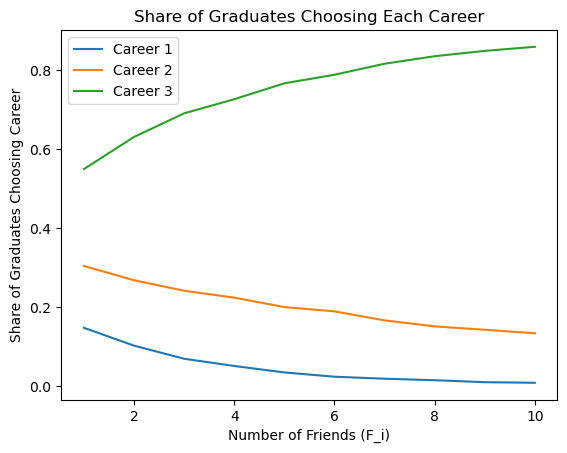

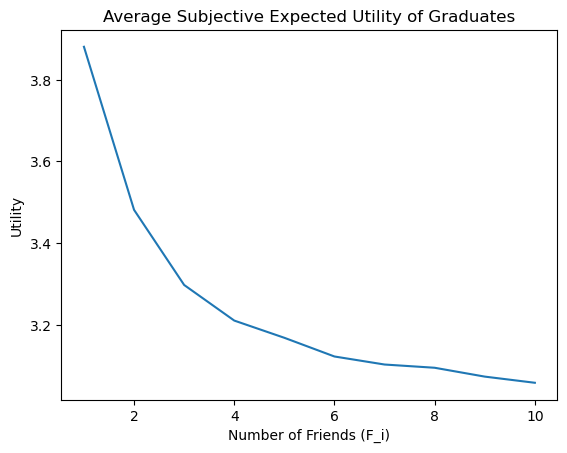

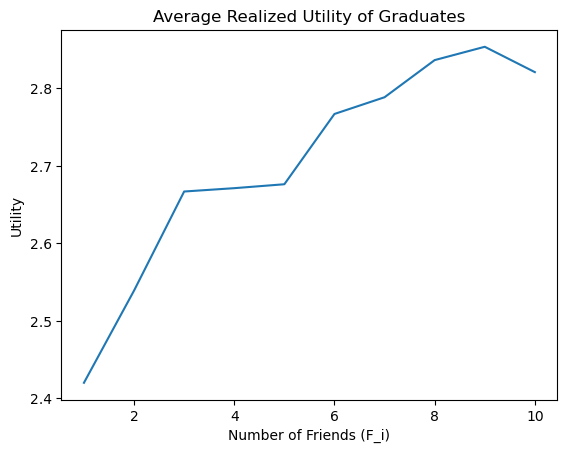

In [255]:
# We use our function to simulate career choices and visualize
chosen_careers, expected_utilities, realized_utilities = q2.simulate_career_choices(par)
q2.calculate_and_prepare_figures(par, chosen_careers, expected_utilities, realized_utilities)

From the figure "Share of Graduates Choosing Each Career" indepentently of how many friends you have, the career with the highest share is career 3. 
And the more friends you get, the more information you have, why the share of graduates choosing career 3 is increasing in the amount of friends you have. 
Because it is shares, this makes the share of graduates choosing career 1 and 2 decrease as amount of friends increase. 

From the graph "Average Subjective Expected Utility of graduates" we see that the average subjective expected utility of graduates decrease as the number of friends increase. This is due to the fact of the noise term. The more friends a graduate have, the more does the expected utility converge to the known values. And together with the noice term we know, that with more friends, the graduates will get an average utility closer to the base values, which is lower. Therefore we observe this trend. 

On the graph "Average Realized Utility" we see that the average utility increases the more friends you have. This makes intuetively sense, since you have more information on the true utility of each career. Therefore graduates with more friends avoids the career with lowest utility more often than graduates with low amount of friends. 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In the scenario where its possible to change careers, we have created simulate_second_year_choices that will simulate the scenario again, but with the option of switching careers, which we afterwards use in calculate_and_visualize to calculate the shares of graduates switching after a year, and to visualize all the results in plots.

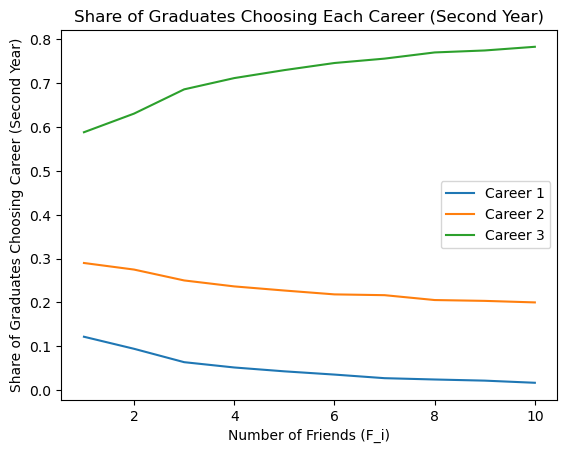

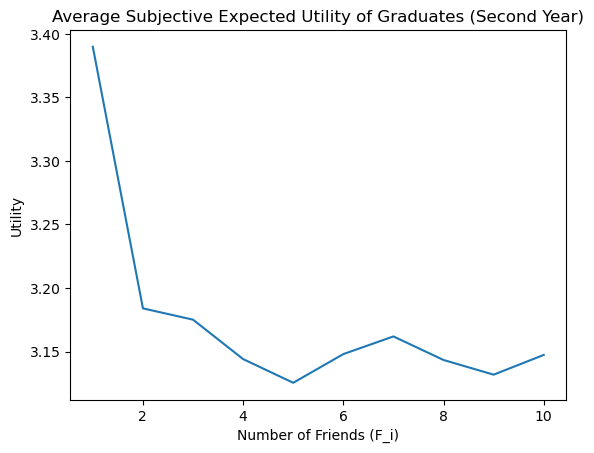

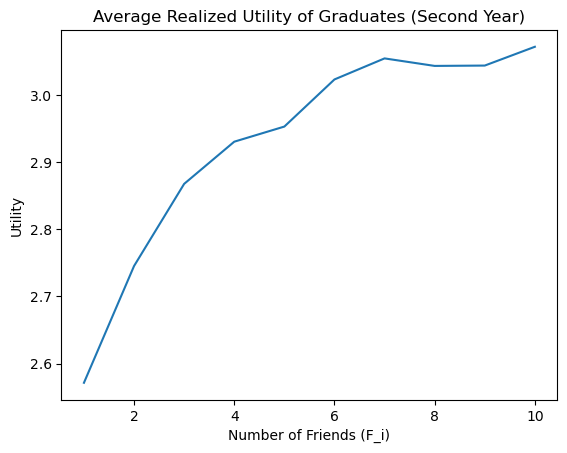

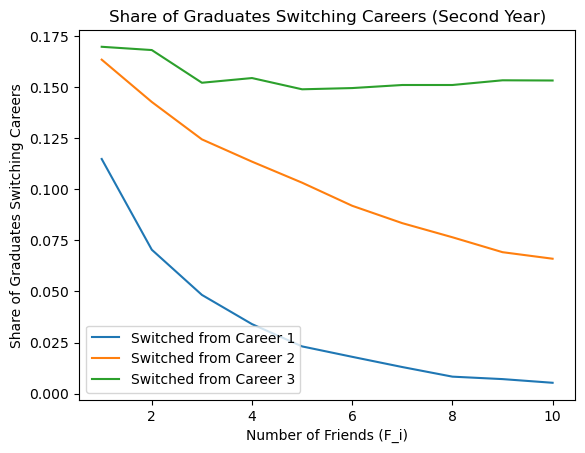

In [256]:
importlib.reload(q2)
# Simulate second-year career choices
chosen_careers, new_chosen_careers, new_expected_utilities, new_realized_utilities, switch_decision = q2.simulate_second_year_choices(par)

# Calculate and prepare figures
figures = q2.calculate_and_visualize(par, chosen_careers, new_chosen_careers, new_expected_utilities, new_realized_utilities, switch_decision)

# Display the figures 
for fig in figures:
    plt.show(fig)

We can start off by looking at the graph "Average Subjective Expected Utility of Graduates (Second Year)". 
Compared to the similar graph in question 2, we see the same decreasing trend. But now graduates have better information about their own choice of career, which will reduce the noise term's impact.
Moreover there is now a switching cost, which also contributes to lower average subjective expected utility compared to question 2. 

From the graph "Average Realized Utility of Graduates (Second Year), we see that the utility is increased for all amount of friends. This makes ituetively sense becuase you now have the possibilty to change career and thereby obtaining higher utility. 

From the graph "Share of Graduates Switching Careers (Second Year)" we see that graduates in career 3 switches career the most, and it is relatively stable comapred to the 2 other careers. We see that the more friends you get, the less do people switch from career 1 and 2. We don't think that this makes intuetively sense. We thought that graduates in career 3 would be the ones switching the least, since they had the highest utility. We tried different solutions in our code, to make it make intuetively sense, but this solution seemed the most correct. 

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

To find and illustrate A, B, C and D we use the function "find_points" from question3.py. We use seed 2024 to be able to recreate the result. 

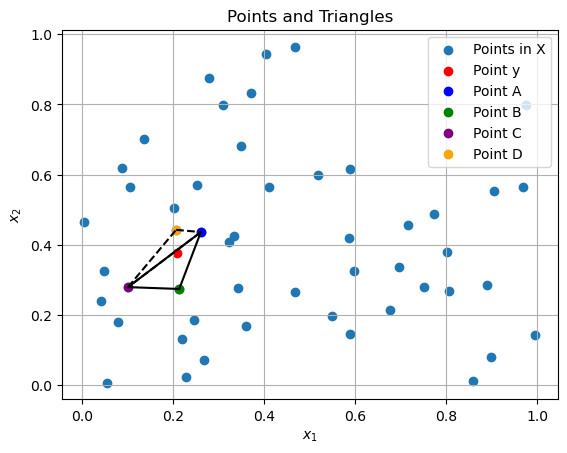

Plotted points and triangles


In [257]:
import question3 as q3

# We set the seed to 2024 for reproducibility 
rng = np.random.default_rng(2024)

# We generate random points in the unit square
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Then we compute the values of f for all points in the set X
F = np.array([q3.f(x) for x in X])

# At last we find A, B, C, and D and Illustrate them.
A, B, C, D = q3.find_points(X, y)
q3.plot_points_and_triangles(X, y, A, B, C, D)
print("Plotted points and triangles")

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

To compute the barycentric coordinates and to see which triangle y is located inside, we use 2 defined functions,
The barycentric_coordinates function and is_inside_triangle. 

In [263]:
# We compute Barycentric Coordinates and Determine the Triangle
r_ABC = q3.barycentric_coordinates(y, A, B, C)
r_CDA = q3.barycentric_coordinates(y, C, D, A)
print("Baycentric coordinates with respect to ABC:", r_ABC)
print("Baycentric coordinates with respect to CDA:", r_CDA)

# We then deterimine if y is inside the triangle ABC or CDA
if q3.is_inside_triangle(*r_ABC):
    print("y is inside the triangle ABC")
elif q3.is_inside_triangle(*r_CDA):
    print("y is inside the triangle CDA")
else:
    print("y is not inside either triangle")

Baycentric coordinates with respect to ABC: (0.4407329133559943, 0.3362411978710884, 0.2230258887729173)
Baycentric coordinates with respect to CDA: (0.7896805544065844, -1.1659086695972625, 1.3762281151906781)
y is inside the triangle ABC


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [259]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

To compute the approximation we use a barycentric interpolation. This is done by using the function "interpolate" we defined in question3.py. This function computes the interpolated value of f at y with a barycentric interpolation.

In [260]:
# We compute the Approximation of f(y) Using the Full Algorithm and Compare with the True Value
approx_f_y = q3.interpolate(y, A, B, C, D, q3.f)
true_f_y = q3.f(y)

print(f"Approximation of f(y): {approx_f_y}")
print(f"True value of f(y): {true_f_y}")
print(f"the difference is: {approx_f_y - true_f_y}")

Approximation of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594
the difference is: 0.005095495684566367


As seen above our approximation is relatively close to the true value.

**Question 4:** Repeat question 3 for all points in the set $Y$.

We now use the same function as in question 3, but now we use the points in the set Y. We do it for the 4 unique points since 2 of the 5 points were the same.

In [261]:
# First we define the set Y and for the rest, we follow the same steps as above
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.5, 0.5)]
results = []

for y in Y:
    A, B, C, D = q3.find_points(X, y)
    approx_f_y = q3.interpolate(y, A, B, C, D, q3.f)
    true_f_y = q3.f(y)
    results.append((y, approx_f_y, true_f_y))

for y, approx_f_y, true_f_y in results:
    print(f"Point y: {y}")
    print(f"Approximation of f(y): {approx_f_y}")
    print(f"True value of f(y): {true_f_y}")
    print()

Point y: (0.2, 0.2)
Approximation of f(y): 0.04032631372248057
True value of f(y): 0.04000000000000001

Point y: (0.8, 0.2)
Approximation of f(y): 0.15874233999349835
True value of f(y): 0.16000000000000003

Point y: (0.8, 0.8)
Approximation of f(y): nan
True value of f(y): 0.6400000000000001

Point y: (0.5, 0.5)
Approximation of f(y): 0.2512901561119622
True value of f(y): 0.25



From the above result it is seen that for all 4 unique points, our approximation gets relatively close to the true values. 